In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats

In [ ]:
df = pd.read_csv('/content/full_FEVS_prototype.csv')
df.columns

# Creating Framework for Analysis
- List of related variables ordered by year
- List of those list for iteration in functions
- Creation of funcitons for mazz vizualisation

In [24]:
reporting_levels = ['Reporting Level_2015', 'Reporting Level_2016', 'Reporting Level_2017', 'Reporting Level_2018', 'Reporting Level_2019', 'Reporting Level_2020', 'Reporting Level_2022']

response_counts = ['Response Count_2015', 'Response Count_2016', 'Response Count_2017', 'Response Count_2018', 'Response Count_2019', 'Response Count_2020', 'Response Count_2022']

employee_engagement_overall = ['Employee Engagement: Overall_2015', 'Employee Engagement: Overall_2016', 'Employee Engagement: Overall_2017', 'Employee Engagement: Overall_2018', 'Employee Engagement: Overall_2019', 'Employee Engagement: Overall_2020', 'Employee Engagement: Overall_2022']

employee_engagement_leaders_lead = ['Employee Engagement: Leaders Lead_2015', 'Employee Engagement: Leaders Lead_2016', 'Employee Engagement: Leaders Lead_2017', 'Employee Engagement: Leaders Lead_2018', 'Employee Engagement: Leaders Lead_2019', 'Employee Engagement: Leaders Lead_2020', 'Employee Engagement: Leaders Lead_2022']

employee_engagement_supervisors = ['Employee Engagement: Supervisors_2015', 'Employee Engagement: Supervisors_2016', 'Employee Engagement: Supervisors_2017', 'Employee Engagement: Supervisors_2018', 'Employee Engagement: Supervisors_2019', 'Employee Engagement: Supervisors_2020', 'Employee Engagement: Supervisors_2022']

employee_engagement_intrinsic = ['Employee Engagement: Intrinsic Work Experience_2015', 'Employee Engagement: Intrinsic Work Experience_2016', 'Employee Engagement: Intrinsic Work Experience_2017', 'Employee Engagement: Intrinsic Work Experience_2018', 'Employee Engagement: Intrinsic Work Experience_2019', 'Employee Engagement: Intrinsic Work Experience_2020', 'Employee Engagement: Intrinsic Work Experience_2022']

new_iq_overall = ['New IQ: Overall_2015', 'New IQ: Overall_2016', 'New IQ: Overall_2017', 'New IQ: Overall_2018', 'New IQ: Overall_2019']

new_iq_fair = ['New IQ: Fair_2015', 'New IQ: Fair_2016', 'New IQ: Fair_2017', 'New IQ: Fair_2018', 'New IQ: Fair_2019']

new_iq_open = ['New IQ: Open_2015', 'New IQ: Open_2016', 'New IQ: Open_2017', 'New IQ: Open_2018', 'New IQ: Open_2019']

new_iq_cooperative = ['New IQ: Cooperative_2015', 'New IQ: Cooperative_2016', 'New IQ: Cooperative_2017', 'New IQ: Cooperative_2018', 'New IQ: Cooperative_2019']

new_iq_supportive = ['New IQ: Supportive_2015', 'New IQ: Supportive_2016', 'New IQ: Supportive_2017', 'New IQ: Supportive_2018', 'New IQ: Supportive_2019']

new_iq_empowered = ['New IQ: Empowered_2015', 'New IQ: Empowered_2016', 'New IQ: Empowered_2017', 'New IQ: Empowering_2018', 'New IQ: Empowering_2019']

global_satisfaction = ['Global Satisfaction_2015', 'Global Satisfaction_2016', 'Global Satisfaction_2017', 'Global Satisfaction_2018', 'Global Satisfaction_2019', 'Global Satisfaction_2020', 'Global Satisfaction_2022']

variables_list = [employee_engagement_leaders_lead, employee_engagement_supervisors, employee_engagement_intrinsic, new_iq_overall, new_iq_fair, new_iq_open, new_iq_cooperative, new_iq_supportive, new_iq_empowered, global_satisfaction ]


In [73]:
#function to create a bar plot of the yearly changes in a variable

def barplot_select_column(df, selected_columns, name):
    column_means = df[selected_columns].mean(axis=0)

    # Create the bar plot
    column_means.plot(kind='bar')

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel(f'Mean {name}')
    plt.title(f'Mean {name} Scores by Year')

    # Display the plot
    plt.show()


#function to turn the variable name into string for naming in column
def var_name(variable):
    # Get the globals() dictionary
    global_vars = globals()

    # Iterate over the items in globals()
    for name, value in global_vars.items():
        if value is variable:
            return name

def anova_test(variables):
  variable_df = df[variables]
  #test the year of the variable
  print(var_name(variables).upper() + '\n')
  for year in variables:
    for other in variables:

      if  test_normality(variable_df[year]) and  test_normality(variable_df[other]) and year != other:

        f_statistic, p_value = stats.f_oneway(variable_df[year], variable_df[other])

        #Print the results
        print(year + ' against ' + other)
        print("F-statistic:", f_statistic)
        print("p-value:", p_value)
        print('\n')
        if p_value < 0.05:
            print("The p-value is less than 0.05, indicating a significant difference between the groups.")
        else:
            print("The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.")
        print('\n')

    print('---------------------------------------------------------------')

#function to test columns for normality
def mass_test_normality(df):
    for column in df.columns:
        # Extract the data from the column
        data = df[column]

        # Perform Shapiro-Wilk test for normality
        statistic, p_value = stats.shapiro(data)



        # Check the significance level to interpret the results
        alpha = 0.05
        if p_value < alpha:
           # Print the test results
          print(f"Column: {column}")
          print("Shapiro-Wilk Test Statistic:", statistic)
          print("p-value:", p_value)
          print("The data does not follow a normal distribution (reject H0)\n")



def test_normality(df):

        # Perform Shapiro-Wilk test for normality
        statistic, p_value = stats.shapiro(df)



        # Check the significance level to interpret the results
        alpha = 0.05
        if p_value > alpha:
           return True





# Initial Insights from Mass Barplotting
- There seems to be an trend of increasing scores that tapers off and possibly lowers after 2020
- Possibly from the change in how we work after the pandemic

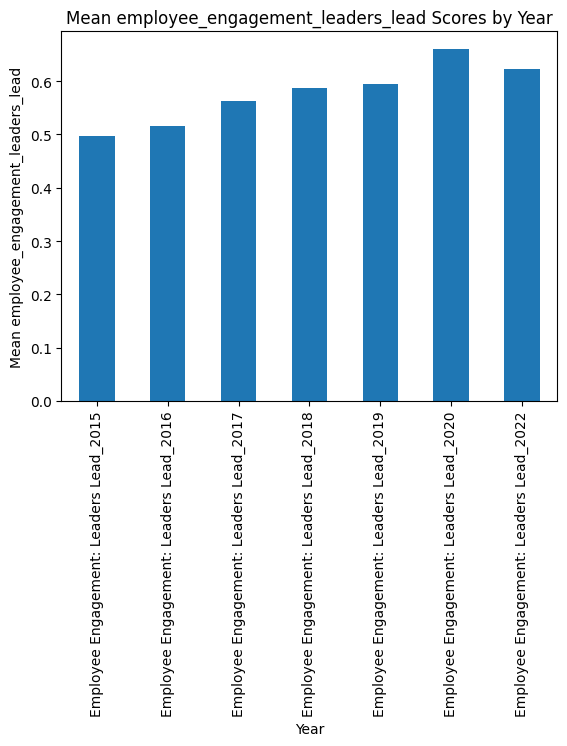

EMPLOYEE_ENGAGEMENT_LEADERS_LEAD

Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2016
F-statistic: 0.7422392328744574
p-value: 0.39096534317241516


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2017
F-statistic: 7.835942876918956
p-value: 0.006126060233049409


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2018
F-statistic: 17.553232453145423
p-value: 5.950558708486834e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2019
F-statistic: 19.863057665426446
p-value: 2.1394601340957107e-05


The p-value is less than 0.05, indicating a significant difference between the gro

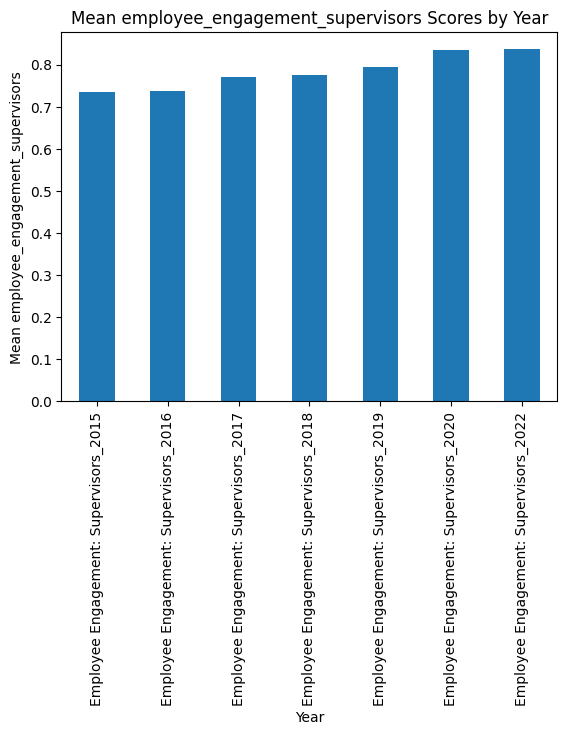

EMPLOYEE_ENGAGEMENT_SUPERVISORS

Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2016
F-statistic: 0.02967545807554842
p-value: 0.8635700171878009


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2017
F-statistic: 5.358492164337144
p-value: 0.022625188946114472


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2018
F-statistic: 9.535253237952604
p-value: 0.0025965459217265887


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2019
F-statistic: 18.226247257880466
p-value: 4.405447386518613e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Empl

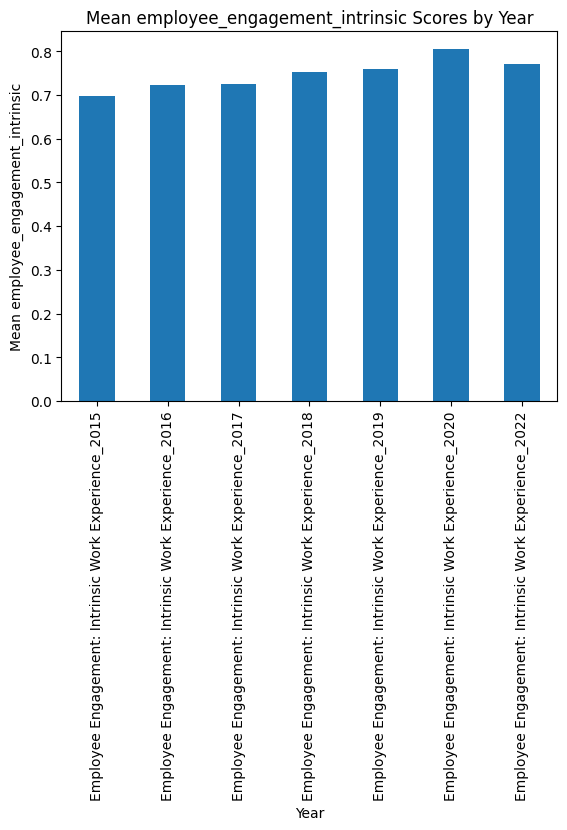

EMPLOYEE_ENGAGEMENT_INTRINSIC

Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2016
F-statistic: 3.9081322451656857
p-value: 0.050752360691533646


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2017
F-statistic: 3.591710309131296
p-value: 0.06089981851454412


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2018
F-statistic: 18.681347776496747
p-value: 3.599407326045098e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2020
F-statistic: 83.50638823722308


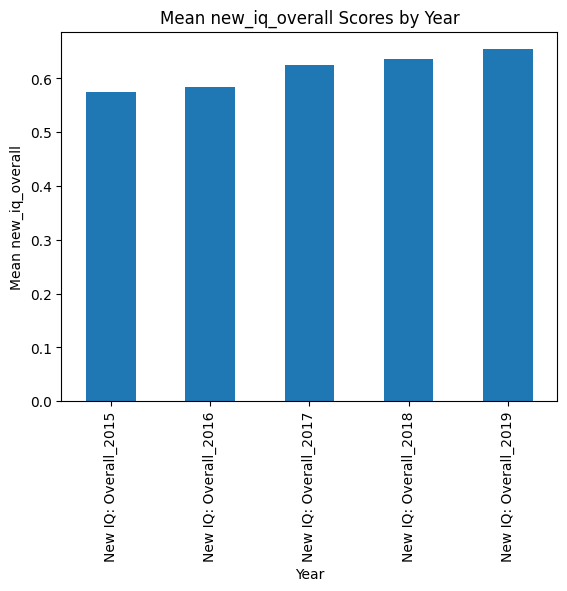

NEW_IQ_OVERALL

New IQ: Overall_2015 against New IQ: Overall_2016
F-statistic: 0.42442834556481146
p-value: 0.5162007851217767


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Overall_2015 against New IQ: Overall_2017
F-statistic: 13.134086247141214
p-value: 0.000454195869552445


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Overall_2015 against New IQ: Overall_2018
F-statistic: 22.47064319310332
p-value: 6.938020977121779e-06


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Overall_2015 against New IQ: Overall_2019
F-statistic: 37.46217049827713
p-value: 1.7483121787650327e-08


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Overall_2016 against New IQ: Overall_2015
F-statistic: 0.4244283455648115
p-value: 0

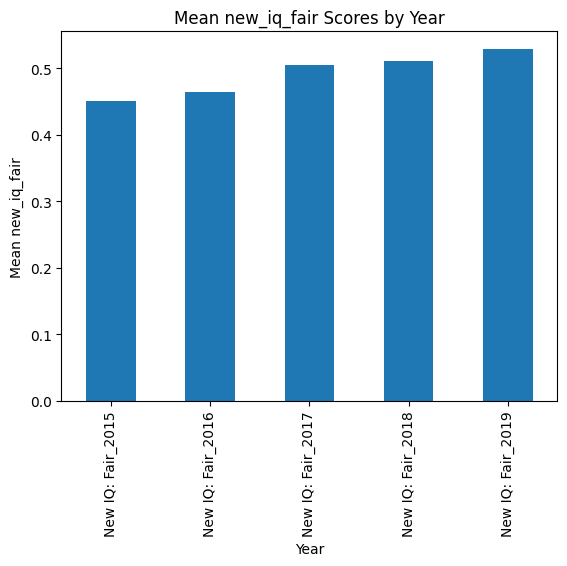

NEW_IQ_FAIR

New IQ: Fair_2015 against New IQ: Fair_2016
F-statistic: 0.7150992096422503
p-value: 0.3997355593411166


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Fair_2015 against New IQ: Fair_2017
F-statistic: 12.757252070298566
p-value: 0.0005429317125923047


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Fair_2015 against New IQ: Fair_2018
F-statistic: 17.147119908320704
p-value: 7.141825686314321e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Fair_2015 against New IQ: Fair_2019
F-statistic: 28.859066662913932
p-value: 4.928953923961079e-07


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Fair_2016 against New IQ: Fair_2015
F-statistic: 0.7150992096422504
p-value: 0.3997355593411166


The p-value 

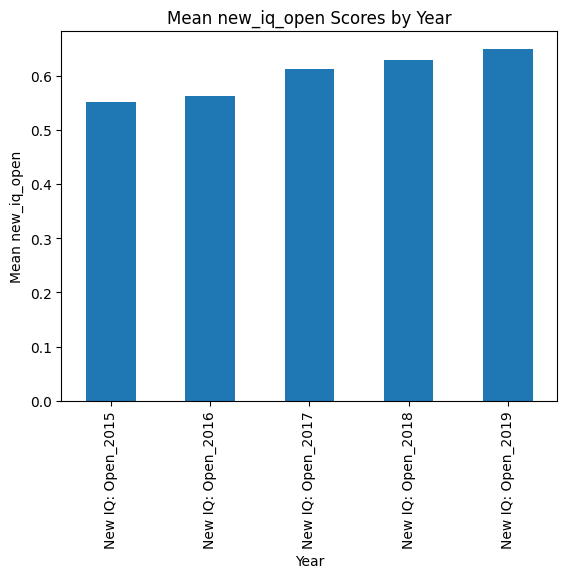

NEW_IQ_OPEN

New IQ: Open_2015 against New IQ: Open_2016
F-statistic: 0.5714093584796337
p-value: 0.4514416351903767


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Open_2015 against New IQ: Open_2017
F-statistic: 17.53774271431972
p-value: 5.992030961379586e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Open_2015 against New IQ: Open_2018
F-statistic: 32.01025980301736
p-value: 1.4113585506813425e-07


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Open_2015 against New IQ: Open_2019
F-statistic: 49.587717514980326
p-value: 2.2685877385999413e-10


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Open_2016 against New IQ: Open_2015
F-statistic: 0.5714093584796337
p-value: 0.4514416351903767


The p-value 

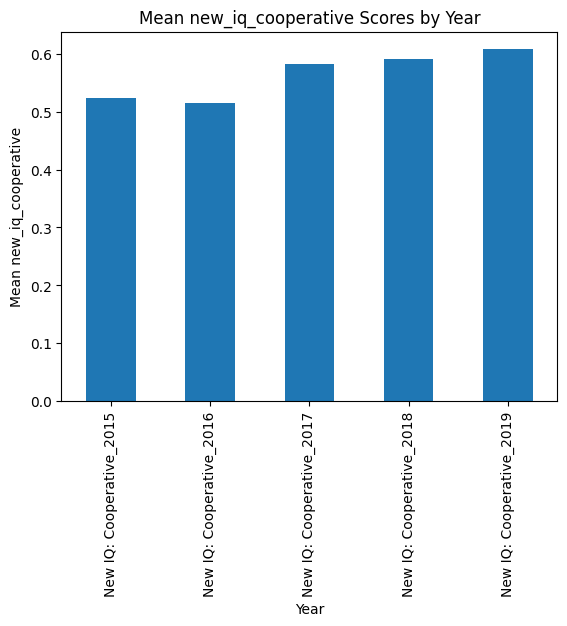

NEW_IQ_COOPERATIVE

New IQ: Cooperative_2015 against New IQ: Cooperative_2016
F-statistic: 0.10745885889123001
p-value: 0.7437278519490608


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Cooperative_2015 against New IQ: Cooperative_2017
F-statistic: 6.071821748330205
p-value: 0.015407472787231978


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Cooperative_2015 against New IQ: Cooperative_2018
F-statistic: 8.603911813494467
p-value: 0.004142865849129712


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Cooperative_2015 against New IQ: Cooperative_2019
F-statistic: 13.849047813299562
p-value: 0.00032451261978708076


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Cooperative_2016 against New IQ: Cooperative_2015

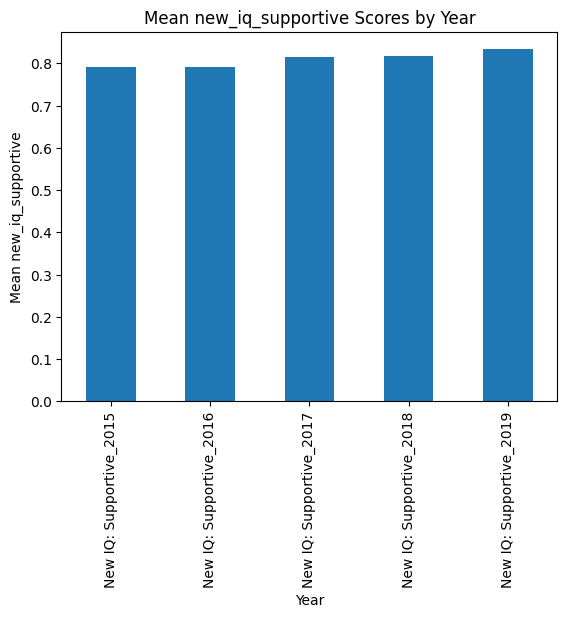

NEW_IQ_SUPPORTIVE

New IQ: Supportive_2015 against New IQ: Supportive_2016
F-statistic: 2.674561278806562e-32
p-value: 1.0


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Supportive_2015 against New IQ: Supportive_2017
F-statistic: 3.58548768846521
p-value: 0.06112010544581478


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Supportive_2015 against New IQ: Supportive_2018
F-statistic: 5.9925672346639045
p-value: 0.01607364846354256


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Supportive_2015 against New IQ: Supportive_2019
F-statistic: 13.622008925999605
p-value: 0.0003609560504137452


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Supportive_2016 against New IQ: Supportive_2015
F-statisti

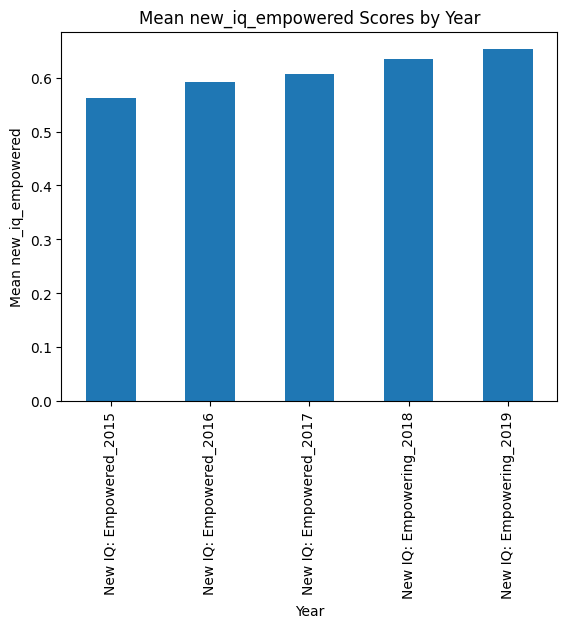

NEW_IQ_EMPOWERED

New IQ: Empowered_2015 against New IQ: Empowered_2016
F-statistic: 3.0296404877259433
p-value: 0.08477178852469054


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Empowered_2015 against New IQ: Empowering_2018
F-statistic: 19.450622689192816
p-value: 2.5635482713208704e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Empowered_2015 against New IQ: Empowering_2019
F-statistic: 30.708231848349673
p-value: 2.3566275442928333e-07


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Empowered_2016 against New IQ: Empowered_2015
F-statistic: 3.0296404877259433
p-value: 0.08477178852469054


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Empowered_2016 against New IQ: Empowering_2018

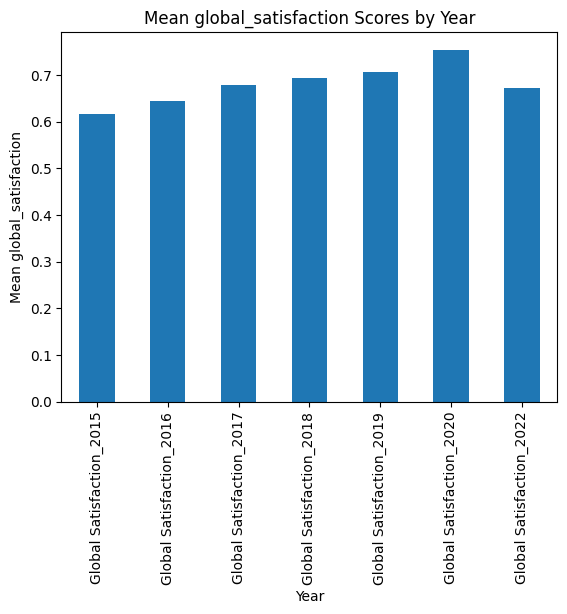

GLOBAL_SATISFACTION

Global Satisfaction_2015 against Global Satisfaction_2016
F-statistic: 2.029355252480302
p-value: 0.15733847147190427


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2018
F-statistic: 15.222196295062888
p-value: 0.00017155897604915476


The p-value is less than 0.05, indicating a significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2019
F-statistic: 21.569787317526156
p-value: 1.0204005301691976e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2020
F-statistic: 57.82389065529722
p-value: 1.4559346943469728e-11


The p-value is less than 0.05, indicating a significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2022
F-statistic: 10.342208147527451
p-value: 0.001742221369647

In [74]:
# iterates over each list of variables and preforms barplotting on the years for it

for variable in variables_list:
  barplot_select_column(df,variable,var_name(variable))

# ANOVA to Compare Average Scores between Different Years

If you want to compare the average score between different years, you can use ANOVA (Analysis of Variance) as a statistical tool. ANOVA is commonly used to compare the means of multiple groups and determine if there are significant differences among them.


### Hypothesis
- Null hypothesis (H₀): The average scores are the same across all years.
- Alternative hypothesis (H₁): The average scores are different across at least two years.

### Data Organization
- Each year is represented by a separate column in your dataset, with the scores for each year recorded in the respective columns.

### Assumption Checking
- ANOVA assumes independence of observations
- normality of the data within each group
- homogeneity of variances across groups.
- Make sure these assumptions hold in your data. You can perform preliminary checks such as normality tests (e.g., Shapiro-Wilk test) and variance tests (e.g., Levene's test) to evaluate these assumptions.

In [ ]:
mass_test_normality(df.select_dtypes(include=['int', 'float']))
# This will be used to screen columns before use in anova functions

### ANOVA Procedure
- Perform the ANOVA test to determine if there are significant differences in the average scores across the years. The ANOVA test will provide you with an F-statistic and a corresponding p-value.

### Result Interpretation
- If the p-value is below your predetermined significance level (e.g., α = 0.05), you can reject the null hypothesis and conclude that there are significant differences in the average scores between at least two years. In such a case, you may perform post-hoc tests (e.g., Tukey's HSD test) to identify which specific years' scores differ significantly from each other.

**Note:** Ensure that ANOVA is appropriate for your specific data and research question before proceeding with the analysis.

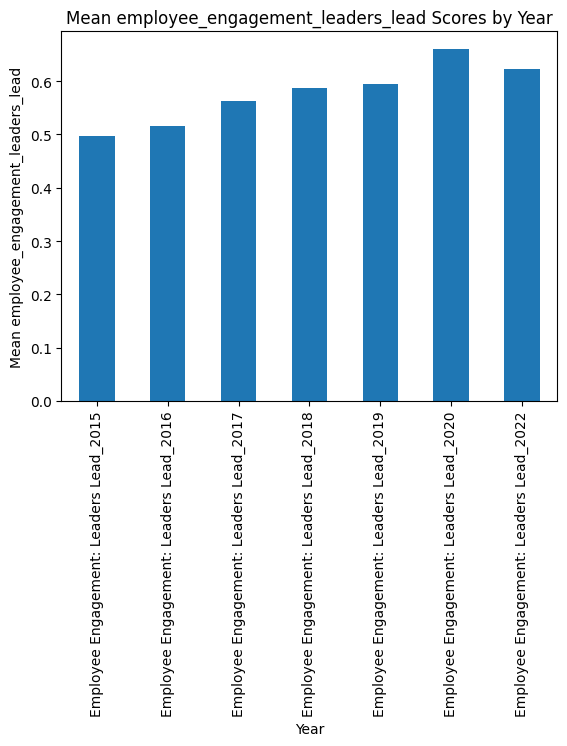

EMPLOYEE_ENGAGEMENT_LEADERS_LEAD

Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2016
F-statistic: 0.7422392328744574
p-value: 0.39096534317241516


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2017
F-statistic: 7.835942876918956
p-value: 0.006126060233049409


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2018
F-statistic: 17.553232453145423
p-value: 5.950558708486834e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Leaders Lead_2015 against Employee Engagement: Leaders Lead_2019
F-statistic: 19.863057665426446
p-value: 2.1394601340957107e-05


The p-value is less than 0.05, indicating a significant difference between the gro

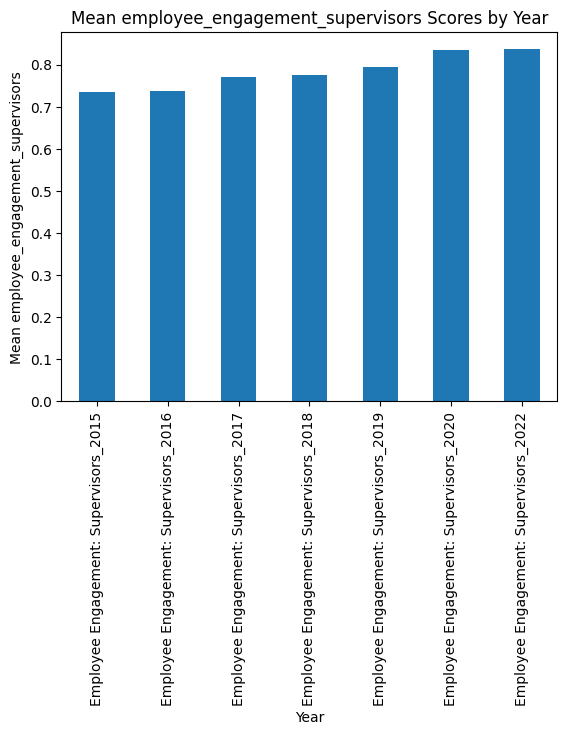

EMPLOYEE_ENGAGEMENT_SUPERVISORS

Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2016
F-statistic: 0.02967545807554842
p-value: 0.8635700171878009


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2017
F-statistic: 5.358492164337144
p-value: 0.022625188946114472


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2018
F-statistic: 9.535253237952604
p-value: 0.0025965459217265887


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Supervisors_2015 against Employee Engagement: Supervisors_2019
F-statistic: 18.226247257880466
p-value: 4.405447386518613e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Empl

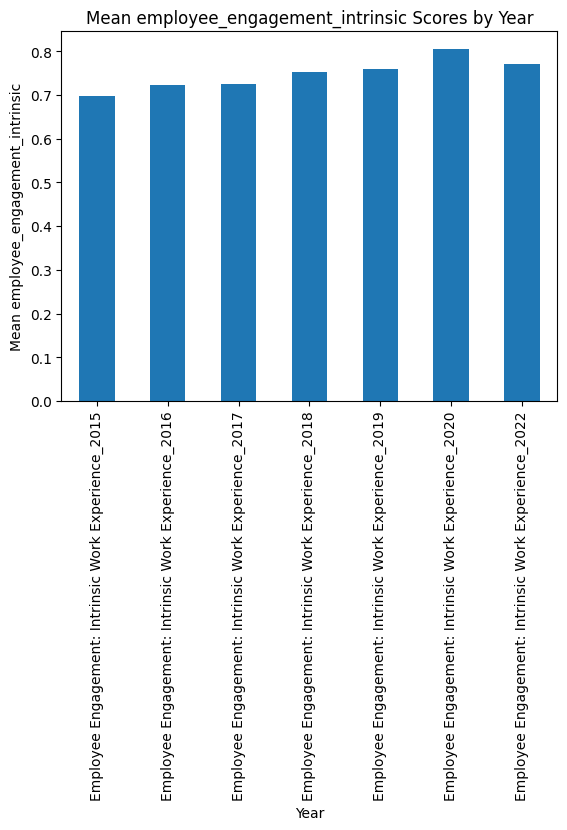

EMPLOYEE_ENGAGEMENT_INTRINSIC

Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2016
F-statistic: 3.9081322451656857
p-value: 0.050752360691533646


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2017
F-statistic: 3.591710309131296
p-value: 0.06089981851454412


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2018
F-statistic: 18.681347776496747
p-value: 3.599407326045098e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Employee Engagement: Intrinsic Work Experience_2015 against Employee Engagement: Intrinsic Work Experience_2020
F-statistic: 83.50638823722308


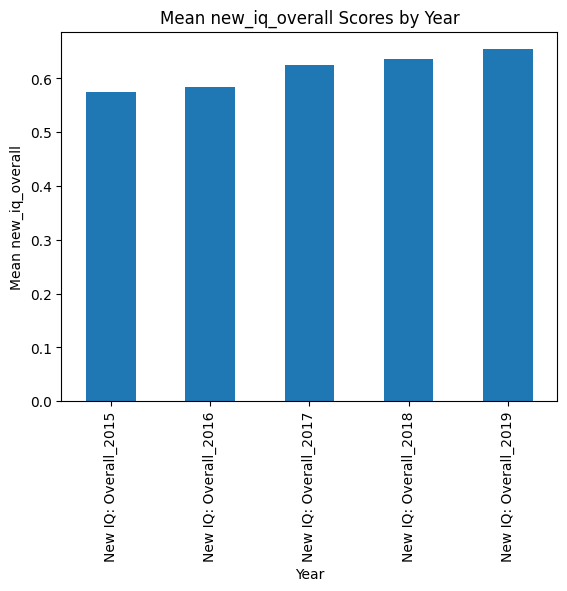

NEW_IQ_OVERALL

New IQ: Overall_2015 against New IQ: Overall_2016
F-statistic: 0.42442834556481146
p-value: 0.5162007851217767


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Overall_2015 against New IQ: Overall_2017
F-statistic: 13.134086247141214
p-value: 0.000454195869552445


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Overall_2015 against New IQ: Overall_2018
F-statistic: 22.47064319310332
p-value: 6.938020977121779e-06


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Overall_2015 against New IQ: Overall_2019
F-statistic: 37.46217049827713
p-value: 1.7483121787650327e-08


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Overall_2016 against New IQ: Overall_2015
F-statistic: 0.4244283455648115
p-value: 0

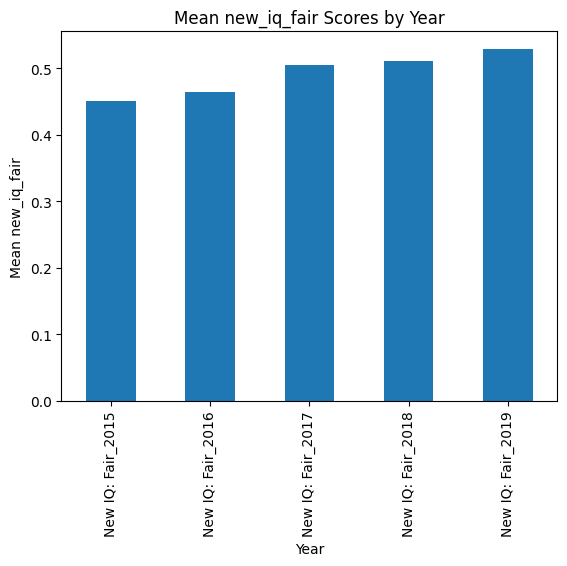

NEW_IQ_FAIR

New IQ: Fair_2015 against New IQ: Fair_2016
F-statistic: 0.7150992096422503
p-value: 0.3997355593411166


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Fair_2015 against New IQ: Fair_2017
F-statistic: 12.757252070298566
p-value: 0.0005429317125923047


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Fair_2015 against New IQ: Fair_2018
F-statistic: 17.147119908320704
p-value: 7.141825686314321e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Fair_2015 against New IQ: Fair_2019
F-statistic: 28.859066662913932
p-value: 4.928953923961079e-07


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Fair_2016 against New IQ: Fair_2015
F-statistic: 0.7150992096422504
p-value: 0.3997355593411166


The p-value 

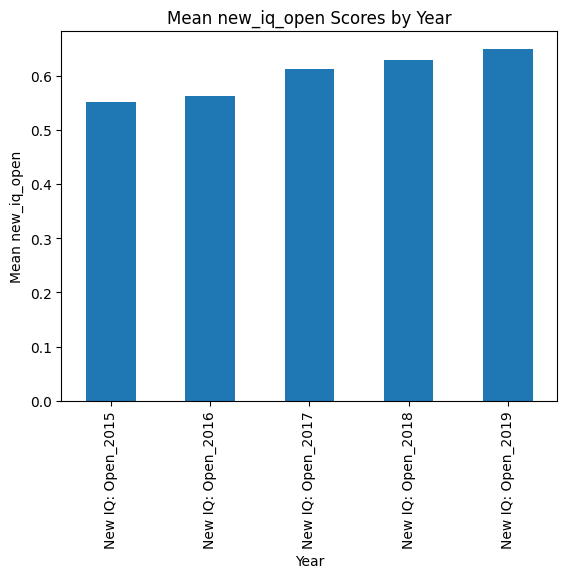

NEW_IQ_OPEN

New IQ: Open_2015 against New IQ: Open_2016
F-statistic: 0.5714093584796337
p-value: 0.4514416351903767


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Open_2015 against New IQ: Open_2017
F-statistic: 17.53774271431972
p-value: 5.992030961379586e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Open_2015 against New IQ: Open_2018
F-statistic: 32.01025980301736
p-value: 1.4113585506813425e-07


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Open_2015 against New IQ: Open_2019
F-statistic: 49.587717514980326
p-value: 2.2685877385999413e-10


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Open_2016 against New IQ: Open_2015
F-statistic: 0.5714093584796337
p-value: 0.4514416351903767


The p-value 

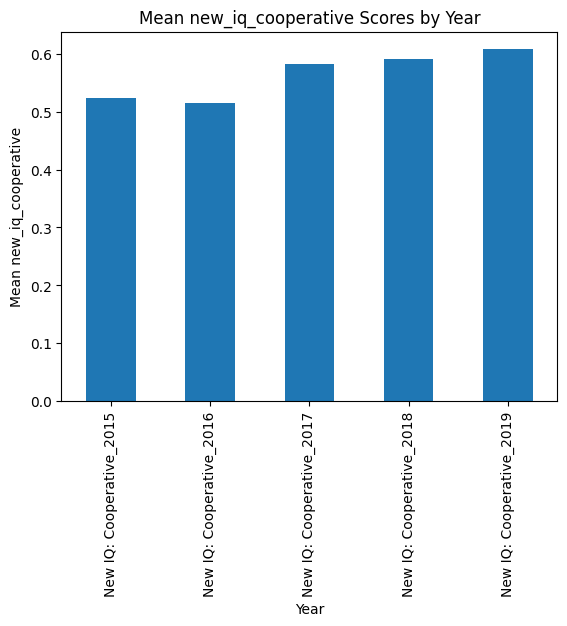

NEW_IQ_COOPERATIVE

New IQ: Cooperative_2015 against New IQ: Cooperative_2016
F-statistic: 0.10745885889123001
p-value: 0.7437278519490608


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Cooperative_2015 against New IQ: Cooperative_2017
F-statistic: 6.071821748330205
p-value: 0.015407472787231978


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Cooperative_2015 against New IQ: Cooperative_2018
F-statistic: 8.603911813494467
p-value: 0.004142865849129712


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Cooperative_2015 against New IQ: Cooperative_2019
F-statistic: 13.849047813299562
p-value: 0.00032451261978708076


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Cooperative_2016 against New IQ: Cooperative_2015

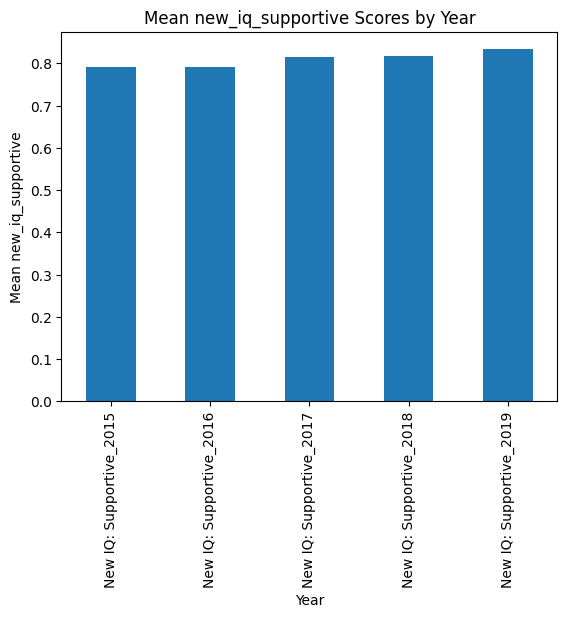

NEW_IQ_SUPPORTIVE

New IQ: Supportive_2015 against New IQ: Supportive_2016
F-statistic: 2.674561278806562e-32
p-value: 1.0


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Supportive_2015 against New IQ: Supportive_2017
F-statistic: 3.58548768846521
p-value: 0.06112010544581478


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Supportive_2015 against New IQ: Supportive_2018
F-statistic: 5.9925672346639045
p-value: 0.01607364846354256


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Supportive_2015 against New IQ: Supportive_2019
F-statistic: 13.622008925999605
p-value: 0.0003609560504137452


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Supportive_2016 against New IQ: Supportive_2015
F-statisti

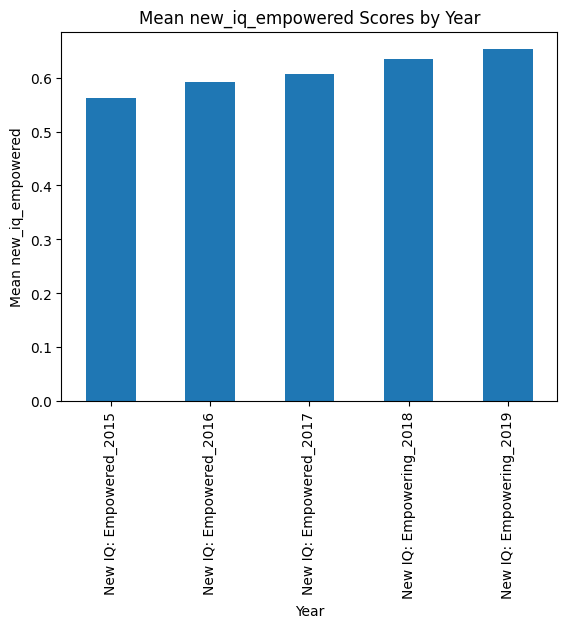

NEW_IQ_EMPOWERED

New IQ: Empowered_2015 against New IQ: Empowered_2016
F-statistic: 3.0296404877259433
p-value: 0.08477178852469054


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Empowered_2015 against New IQ: Empowering_2018
F-statistic: 19.450622689192816
p-value: 2.5635482713208704e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


New IQ: Empowered_2015 against New IQ: Empowering_2019
F-statistic: 30.708231848349673
p-value: 2.3566275442928333e-07


The p-value is less than 0.05, indicating a significant difference between the groups.


---------------------------------------------------------------
New IQ: Empowered_2016 against New IQ: Empowered_2015
F-statistic: 3.0296404877259433
p-value: 0.08477178852469054


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


New IQ: Empowered_2016 against New IQ: Empowering_2018

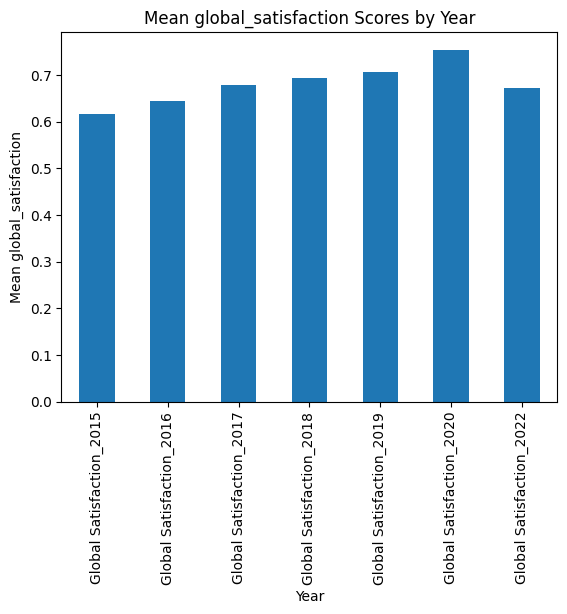

GLOBAL_SATISFACTION

Global Satisfaction_2015 against Global Satisfaction_2016
F-statistic: 2.029355252480302
p-value: 0.15733847147190427


The p-value is greater than or equal to 0.05, indicating no significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2018
F-statistic: 15.222196295062888
p-value: 0.00017155897604915476


The p-value is less than 0.05, indicating a significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2019
F-statistic: 21.569787317526156
p-value: 1.0204005301691976e-05


The p-value is less than 0.05, indicating a significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2020
F-statistic: 57.82389065529722
p-value: 1.4559346943469728e-11


The p-value is less than 0.05, indicating a significant difference between the groups.


Global Satisfaction_2015 against Global Satisfaction_2022
F-statistic: 10.342208147527451
p-value: 0.001742221369647

In [75]:
for variable in variables_list:
  barplot_select_column(df,variable,var_name(variable))
  anova_test(variable)